# Sentiment analysis

For this excercise, we will use corpus data.

### Importing key modules

In [0]:
from textblob import TextBlob
import pandas as pd

In [2]:
data = pd.read_pickle('corpus.pkl')
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name
name,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney


In [3]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity
name,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137


### Visualization

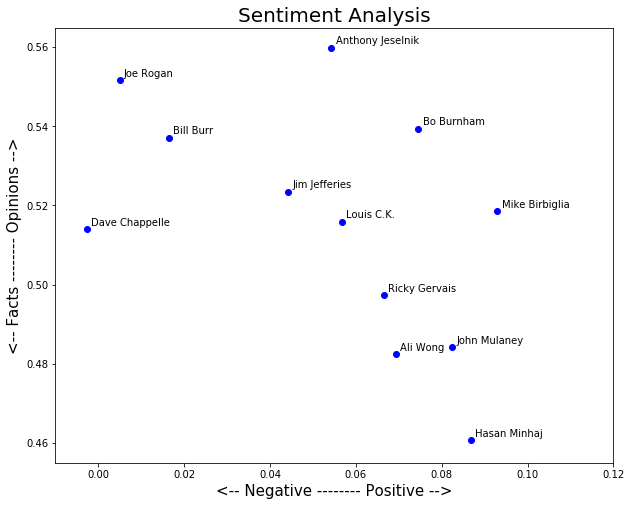

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Sentiment of Routine Over Time

In [0]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [6]:
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity
name,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik,0.054285,0.559732
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr,0.016479,0.537016
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle,-0.002690,0.513958
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan,0.004968,0.551628
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137


In [7]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\r\r\nAnd then, when they go to sleep, they just 

In [8]:
# The list has 10 elements, one for each transcript
len(list_pieces)

12

In [9]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [10]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.11168482647296207,
  0.056407029478458055,
  0.09445691155249979,
  0.09469668577307465,
  -0.014671592775041055,
  0.09199378297961454,
  0.06079713127248339,
  0.08721655328798185,
  0.030089690638160044,
  0.07351994851994852],
 [0.13933883477633482,
  -0.06333451704545455,
  -0.056153799903799935,
  0.014602659245516405,
  0.16377334420812684,
  0.09091338259441709,
  0.09420031055900621,
  0.11566683919944787,
  -0.05070608684245053,
  0.07360080395794678],
 [-0.0326152022580594,
  0.006825656825656827,
  0.023452001215159095,
  0.01934081890331888,
  -0.026312183887941466,
  0.06207506613756614,
  0.030250682288725742,
  -0.020351594027441484,
  -0.01150485008818343,
  0.10757491470108295],
 [0.17481829573934843,
  -0.04116923483102918,
  -0.022686011904761886,
  0.019912549136687042,
  0.0592493946731235,
  0.05700242218099361,
  0.04407051282051284,
  0.11019892033865757,
  0.19319944575626394,
  0.23029900332225917],
 [-0.05093449586407334,
  -0.05557354333778966,
  0.0358

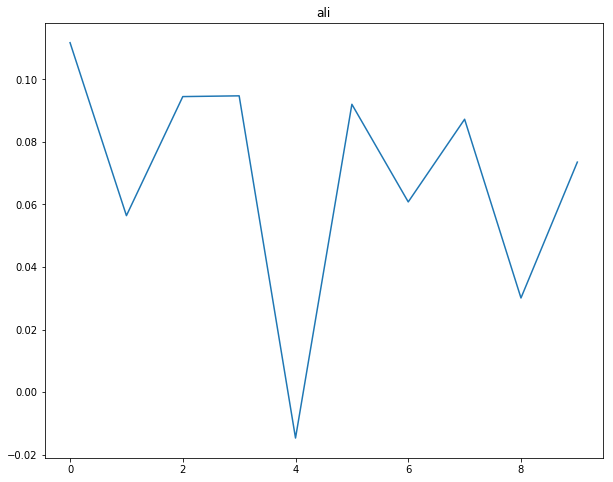

In [11]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


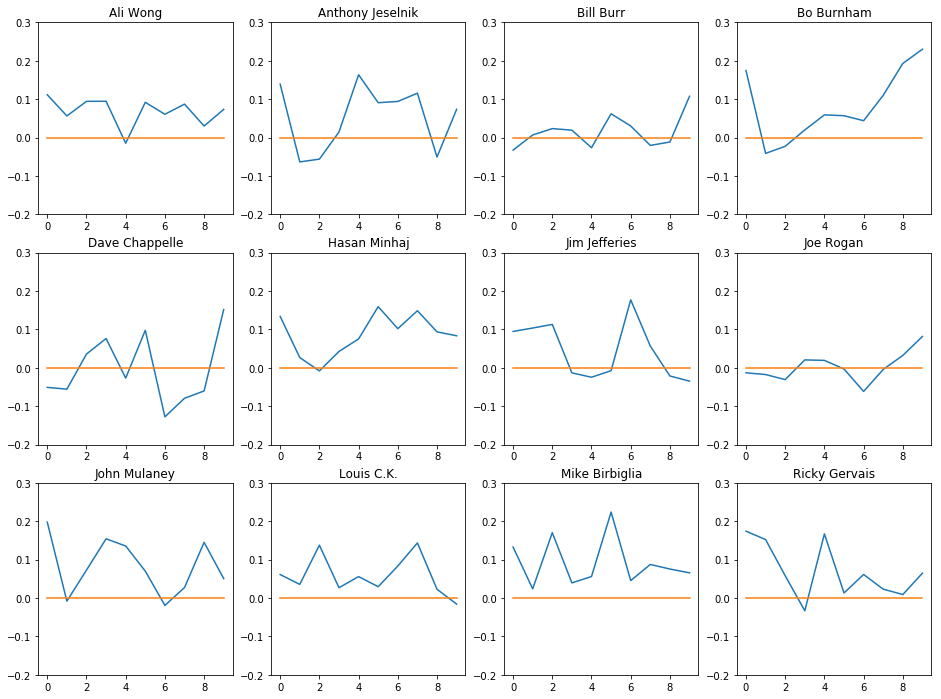

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### using more splits for given data

In [0]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=20):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [14]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\r\r\nAnd then, when they go to sleep, they just 

In [15]:
len(list_pieces)

12

In [16]:
len(list_pieces[0])

20

In [17]:
len(list_pieces[1])

20

In [18]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.18230030721966203,
  0.0335034013605442,
  0.09856398809523811,
  0.02090643274853801,
  0.11037581699346405,
  0.07853800611153554,
  0.039282694962042786,
  0.13581029185867893,
  0.016666666666666663,
  -0.03669387755102041,
  0.03431517611779561,
  0.1858715503246753,
  0.08565315315315315,
  0.03374793099057805,
  0.0769073220686124,
  0.08333333333333333,
  0.07185773074661965,
  0.0014885265700483271,
  0.024843358395989994,
  0.12490079365079367],
 [0.2678294552669553,
  0.010848214285714293,
  -0.033207792207792214,
  -0.08264652014652014,
  -0.1334353741496599,
  0.031099590373783917,
  0.13125000000000003,
  -0.05312805474095798,
  0.11977124183006535,
  0.2065182436611008,
  0.008928571428571414,
  0.17289819376026275,
  0.178125,
  0.029642857142857137,
  0.08748677248677247,
  0.15242272347535502,
  -0.20135438233264324,
  0.05757237554112554,
  0.01940836940836938,
  0.14585738335738338],
 [0.01614895152129194,
  -0.0847041847041847,
  -0.01004088504088504,
  0.03156

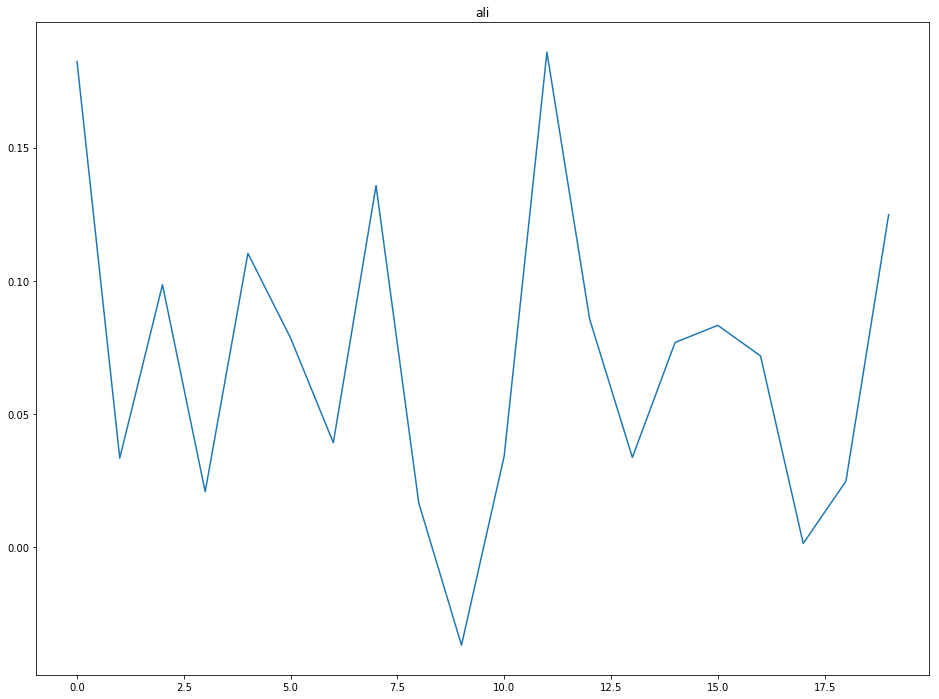

In [19]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

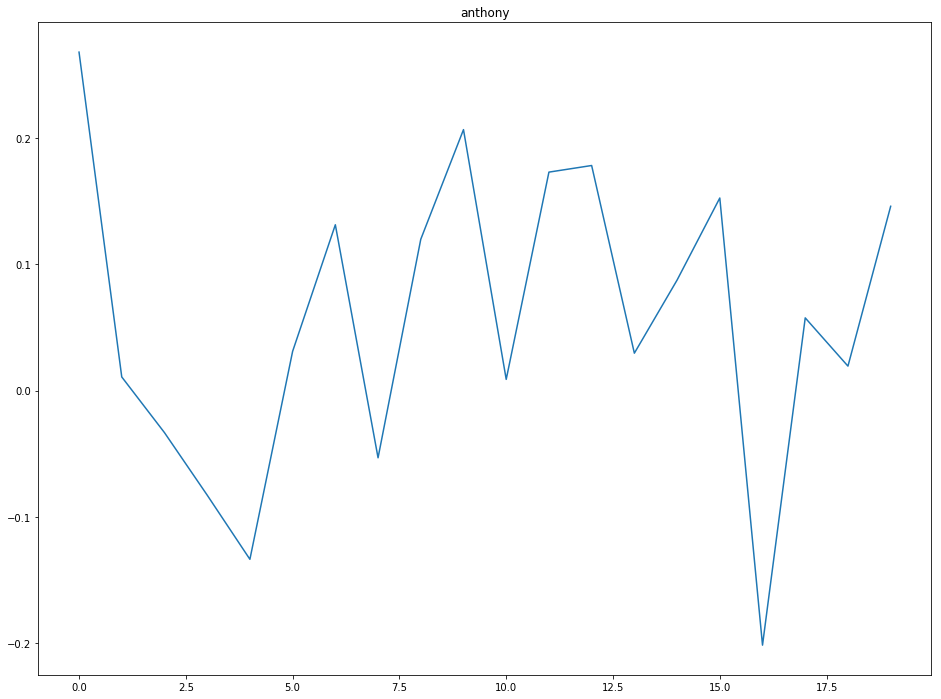

In [20]:
# Show the plot for one comedian
plt.plot(polarity_transcript[1])
plt.title(data['full_name'].index[1])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


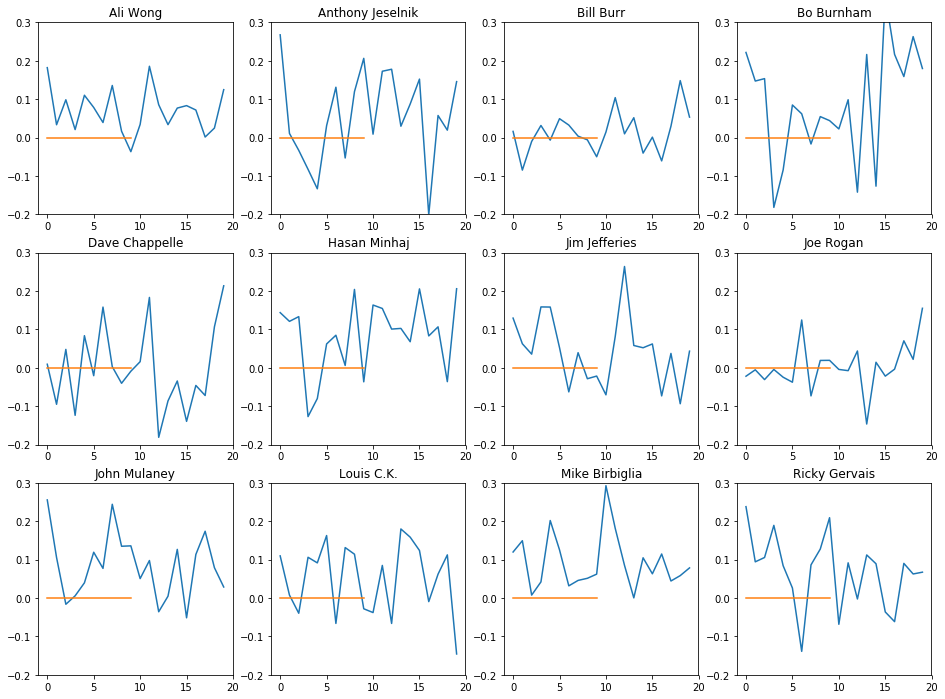

In [21]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

# For Further analysis as categery

In [22]:
# For sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [0]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [0]:
data['Sent_compound_Polarity'] = data.transcript.apply(lambda x:sid.polarity_scores(x)['compound'])
data['Sent_type']=''

In [26]:
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity,Sent_compound_Polarity,Sent_type
name,,,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403,0.9988,
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik,0.054285,0.559732,-0.7024,
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr,0.016479,0.537016,-0.9977,
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368,0.9999,
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle,-0.002690,0.513958,-0.9999,
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619,1.0000,
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382,0.9999,
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan,0.004968,0.551628,-0.9999,
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137,1.0000,


We can see how compound polarity calculated from Vader is different from textblob. One reason is that it has taken overall polarity from transcript text and then value it

In [0]:
data.loc[data.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

data.loc[data.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

data.loc[data.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [28]:
data

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity,Sent_compound_Polarity,Sent_type
name,,,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403,0.9988,Positive
anthony,"Thank you. Thank you. Thank you, San Francisco...",6713,34526,4.135863,2299,0,6,317,Anthony Jeselnik,0.054285,0.559732,-0.7024,Negative
bill,"[cheers and applause] All right, thank you! Th...",12218,64607,4.287936,4323,1,32,415,Bill Burr,0.016479,0.537016,-0.9977,Negative
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368,0.9999,Positive
dave,This is Dave. He tells dirty jokes for a livin...,9145,48109,4.244626,3118,0,9,410,Dave Chappelle,-0.002690,0.513958,-0.9999,Negative
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619,1.0000,Positive
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382,0.9999,Positive
joe,[rock music playing] [audience cheering] [anno...,9959,53750,4.395743,3471,0,9,207,Joe Rogan,0.004968,0.551628,-0.9999,Negative
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137,1.0000,Positive


We do not have any neural sentiment either positive or negative

Our main comedian Ali wong  routine comes as Positive overall. Let's see if we could classify our sentiments

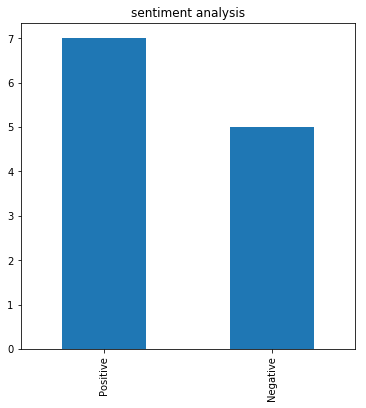

In [29]:
data.Sent_type.value_counts().plot (kind='bar' , title="sentiment analysis")

In [30]:
data.Sent_type.value_counts()

Positive    7
Negative    5
Name: Sent_type, dtype: int64

In [0]:
# extracting the number of sentiments of each class
Pos_len = data[data['Sent_type'] == 'Positive'].shape[0]
Neg_len = data[data['Sent_type'] == 'Negative'].shape[0]

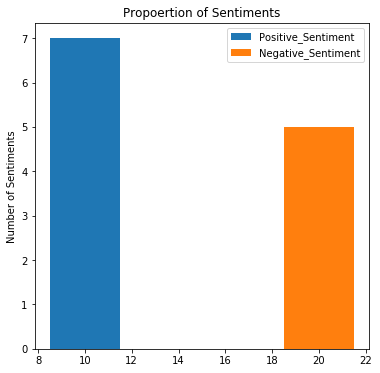

In [32]:
# bar plot of the 3 classes
plt.bar(10,Pos_len,3, label="Positive_Sentiment")
plt.bar(20,Neg_len,3, label="Negative_Sentiment")
plt.legend()
plt.ylabel('Number of Sentiments')
plt.title('Propoertion of Sentiments')
plt.show()

### Checking positive and negative sentiment content

In [33]:
from wordcloud import WordCloud, STOPWORDS
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
%pylab inline

stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['load', 'random', 'split']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Positive words


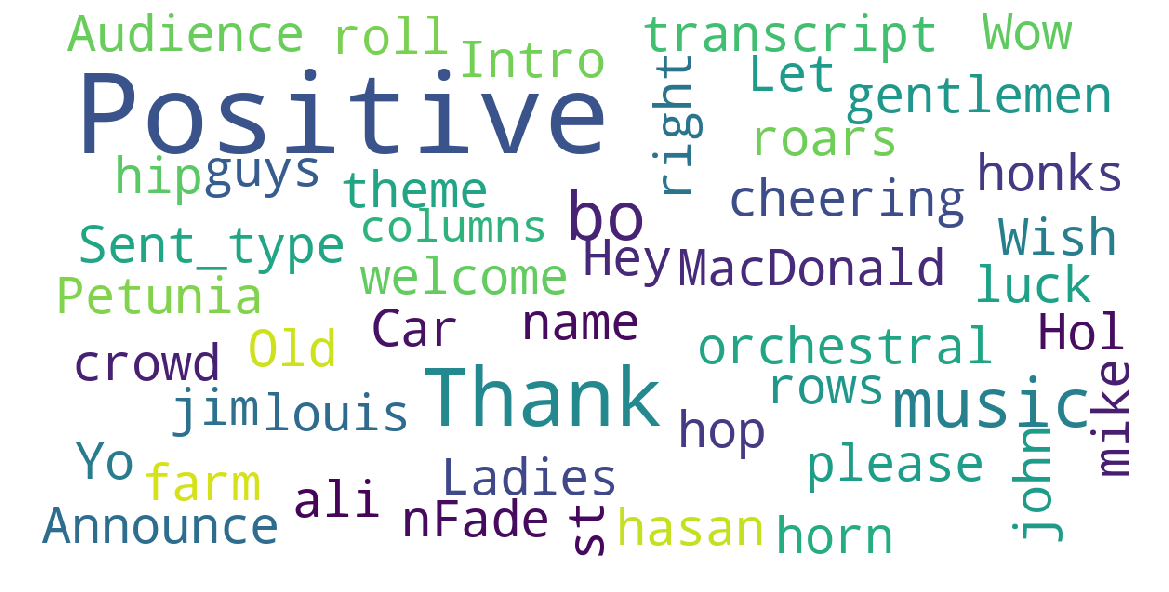

In [34]:
sentiment_pos = data[ data['Sent_type'] == 'Positive']
print("Positive words")
Mywordcloud(sentiment_pos)

In [0]:
sentimet_neg = data[ data['Sent_type'] == 'Negative']

Negative words


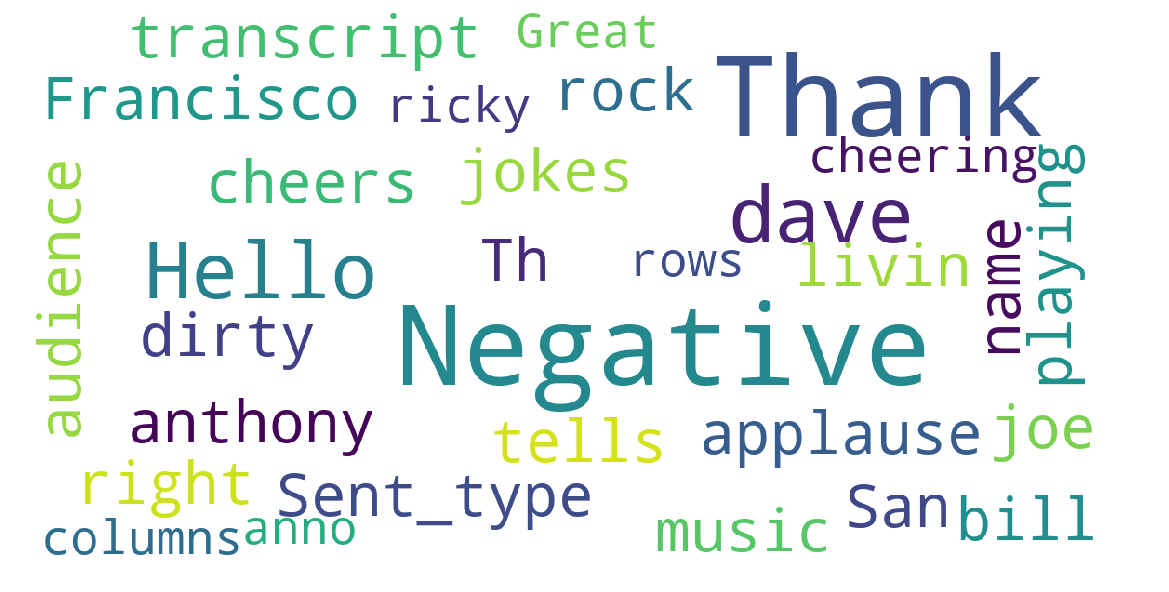

In [36]:
print("Negative words")
Mywordcloud(sentimet_neg)

# Top words of each sentiment and their count

### a)Positive

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent_pos = data[data['Sent_type'] == 'Positive']

In [0]:
data_clean=pd.read_pickle('data_clean.pkl')
#data_clean.to_pickle('data_clean.pkl')

In [39]:
data_clean

,transcript,word_count,char_count
name,,,
ali,lady gentleman please welcome stage ali wong h...,3618,22313
anthony,thank thank thank san francisco thank much goo...,3363,19937
bill,right thank thank much thank thank thank whats...,6093,36603
bo,bo old macdonald farm e e farm pig e e snort o...,3474,20762
dave,dave tell dirty joke living stare hard work ha...,4692,28081
hasan,whats davis whats im home bring back netflix s...,5334,31451
jim,lady gentleman please welcome stage mr jim jef...,5401,32191
joe,lady gentleman welcome joe rogan fuck going sa...,5052,30548
john,right petunia wish luck die august thats prett...,4551,27267


In [40]:
sent_pos['clean']= data_clean['transcript']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
sent_pos

,transcript,word_count,char_count,avg_word,stopwords,special-words,numerics,upper,full_name,polarity,subjectivity,Sent_compound_Polarity,Sent_type,clean
name,,,,,,,,,,,,,,
ali,"Ladies and gentlemen, please welcome to the st...",7357,38992,4.288234,2762,0,10,309,Ali Wong,0.069359,0.482403,0.9988,Positive,lady gentleman please welcome stage ali wong h...
bo,Bo What? Old MacDonald had a farm E I E I O An...,7148,38509,4.387521,2192,1,9,264,Bo Burnham,0.074514,0.539368,0.9999,Positive,bo old macdonald farm e e farm pig e e snort o...
hasan,[theme music: orchestral hip-hop] [crowd roars...,10497,56130,4.341043,3267,5,12,486,Hasan Minhaj,0.086856,0.460619,1.0000,Positive,whats davis whats im home bring back netflix s...
jim,[Car horn honks] [Audience cheering] [Announce...,11094,58688,4.288302,3898,0,10,406,Jim Jefferies,0.044224,0.523382,0.9999,Positive,lady gentleman please welcome stage mr jim jef...
john,"All right, Petunia. Wish me luck out there. Yo...",9298,48514,4.214685,3483,0,13,324,John Mulaney,0.082355,0.484137,1.0000,Positive,right petunia wish luck die august thats prett...
louis,Intro\r\r\nFade the music out. Let’s roll. Hol...,7468,39178,4.227862,2539,0,10,257,Louis C.K.,0.056665,0.515796,0.9975,Positive,intro fade music let roll hold light light tha...
mike,"Wow. Hey, thank you. Thanks. Thank you, guys. ...",11439,59108,4.157761,4323,0,17,607,Mike Birbiglia,0.092927,0.518476,1.0000,Positive,wow hey thank thanks thank guy hey seattle nic...


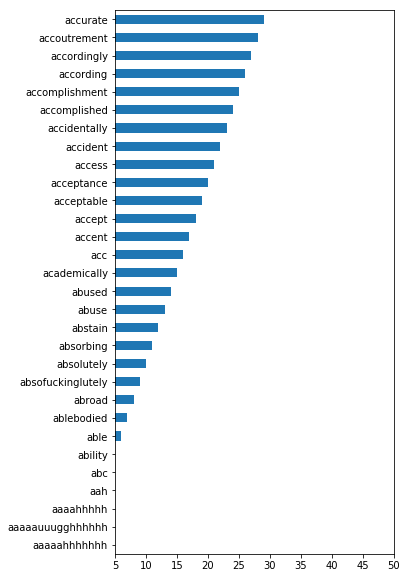

In [42]:
# create the object of tfid vectorizer
pos_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
pos_tfid_vectorizer.fit(sent_pos['clean'])
# collect the vocabulary items used in the vectorizer
pos_dictionary = pos_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in pos_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
pos_vocab = pd.Series(count, index=vocab)
# sort the dataframe
pos_vocab = pos_vocab.sort_values(axis=0, ascending=True, kind= 'quicksort')
# plot of the top vocab
top_vacab = pos_vocab.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5, 50))

### b)- For negative

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


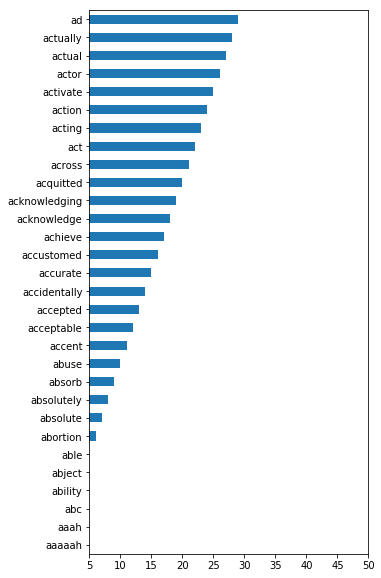

In [43]:
sent_neg = data[data['Sent_type'] == 'Negative']
sent_neg['clean']= data_clean['transcript']

# create the object of tfid vectorizer
neg_tfid_vectorizer = TfidfVectorizer("english")
# fit the vectorizer using the text data
neg_tfid_vectorizer.fit(sent_neg['clean'])
# collect the vocabulary items used in the vectorizer
neg_dictionary = neg_tfid_vectorizer.vocabulary_.items()

# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in neg_dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
neg_vocab = pd.Series(count, index=vocab)
# sort the dataframe
neg_vocab = neg_vocab.sort_values(axis=0, ascending=True, kind= 'quicksort')
# plot of the top vocab
top_vacab = neg_vocab.head(30)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (5, 50))